In [15]:
!pip install numpy pandas matplotlib seaborn imbalanced-learn 

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


# Mall Customers Segmentation (Project 4)</u>

## What is the problem?
For this project, we must use clustering to try and explore customers at a shopping mall. We are hoping to uncover hidden patterns or clusters based off the different variables in the data set. We are hoping that these patterns that are determine could help us better understand the thinking behind the individuals when they are shopping at the mall based on age, gender, spending power, or income.

## Questions we are trying to answer?

1. **Are there distinct types of shoppers based on their income and spending behavior?**

2. **Can we identify high-income but low-spending customers (potential marketing targets)?**

3. **Do age or gender groups correlate with certain spending behaviors?**

## What is Clustering? 
1) Clustering is an unsupervised machine learning technique that is used to group data points based on similar factors. This technique finds natural groupings based on the features that are inputted based off the data set.

2) <b>Two Clustering (Learned in class) </b>
- **K-Means Clustering:** divides the data into K clusters, where each point belongs to the cluster with the nearest centroid. This method works well when clusters are similar sized

- **Agglomerative Clustering:** a bottom-up approach where each point starts its own cluster and pairs of clusters are merged based on distance (usually using Euclidean distance). This technique provides a visual understanding of cluster relationships 



## Introducing the Data 
For this project, I found a dataset on Kaggle that explores mall customer behavior and demographics. You can directly view or download the dataset by clicking <a href="https://www.kaggle.com/datasets/abdallahwagih/mall-customers-segmentation/data" id="url" runat="server">HERE</a>. Hopefully with this data set, we will be able to identify patterns that can help us better understand specific factors that influence spending habits at malls.

### Dataset Information:
This data set contains 5 columns and includes 200 customers. The columns in the data set are as follows:
- CustomerID (Numerical) - a unique ID for each customer.
- Genre (Categorical) - customers gender either male or female.
- Age (Numerical) - customer's age, ranging from 18-70 years old.
- Annual Income (Numerical) - this is represented in (k$ or thousand dollars) and is the estimated yearly income of the customers.
- Spending Score (Numerical) - this value is assigned by the mall based on how much and often customer spends, this ranges from 1-100.

In [16]:
import pandas as pd

### Import and read the dataset that I am using for this project.

In [17]:
df = pd.read_csv("Mall_Customers.csv")

### Checking using the df.head() command to make sure that the dataset was properly imported into the project file.

In [18]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Checking the column names, and showing the data type that each column has.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### Checking to see if there are any missing values in the data set that may cause issues later on when we do the experiments. As we can see there are not any missing values in the dataset.

In [20]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


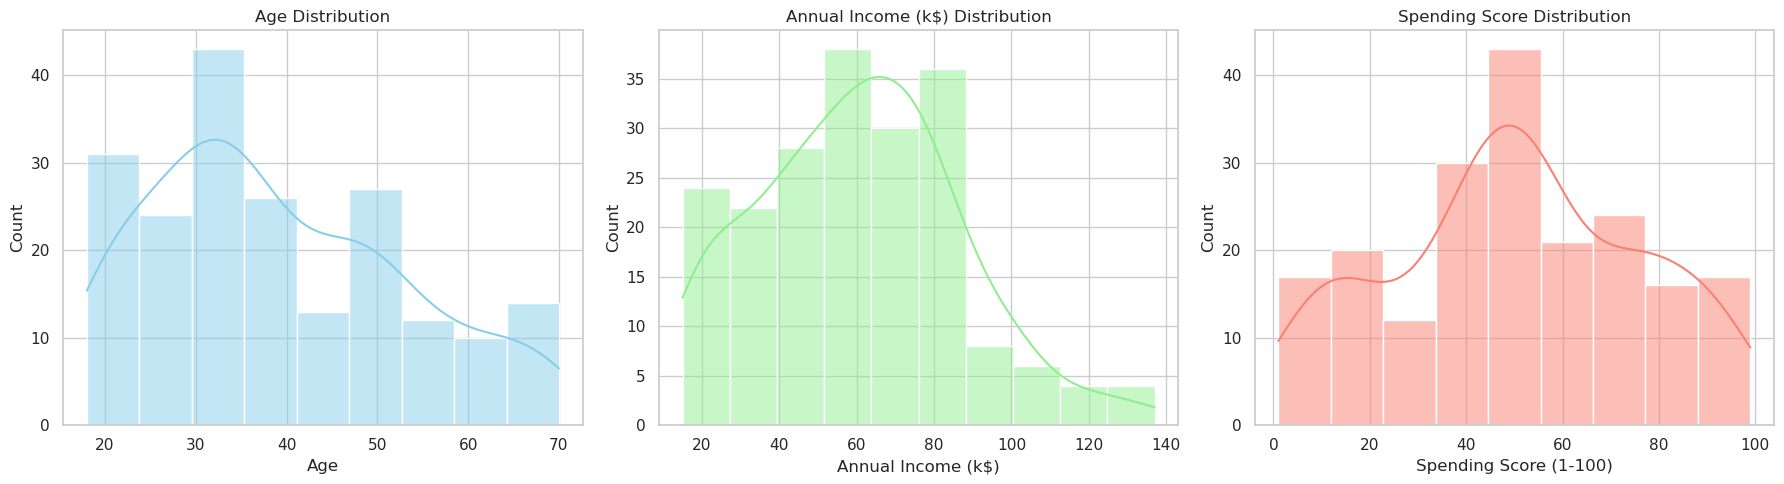

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df["Age"], kde=True, color="skyblue", ax=axes[0])
axes[0].set_title("Age Distribution")
axes[0].set_xlabel("Age")

sns.histplot(df["Annual Income (k$)"], kde=True, color="lightgreen", ax=axes[1])
axes[1].set_title("Annual Income (k$) Distribution")
axes[1].set_xlabel("Annual Income (k$)")

sns.histplot(df["Spending Score (1-100)"], kde=True, color="salmon", ax=axes[2])
axes[2].set_title("Spending Score Distribution")
axes[2].set_xlabel("Spending Score (1-100)")

plt.tight_layout()
plt.show()


## Data Understanding/Visualization
- To better understand the data set that we are using for this project, I visualized the distribution of the what I thought would be the most important numerical variables. These are **Age, Annual Income, and Spending Score**.
  
### Observations:
1) **Age** - Most of the customers tend to fall between the ages of 20 and 40. However, because there is a wide range from 18-70, this could help us determine age clusters in our data set.
2) **Income** - the uniform income throughout the entire range suggests that customers come from all variety of economic backgrounds and could possibly allow us to do some cluster modeling.
3) **Spending Score** - This variable suggests that some customer spend a lot and some are more laid back when it comes to spending their money which could be useful when trying to find segments when modeling.

- This is important to help modeling because we are able to identify specific variables that would be useful to focus on during our modeling portion of the project. These seem based on the initial visualization that it will create clusters because of the wide range of data and specific features that are apparent.

## Annual Income Vs. Spending Score

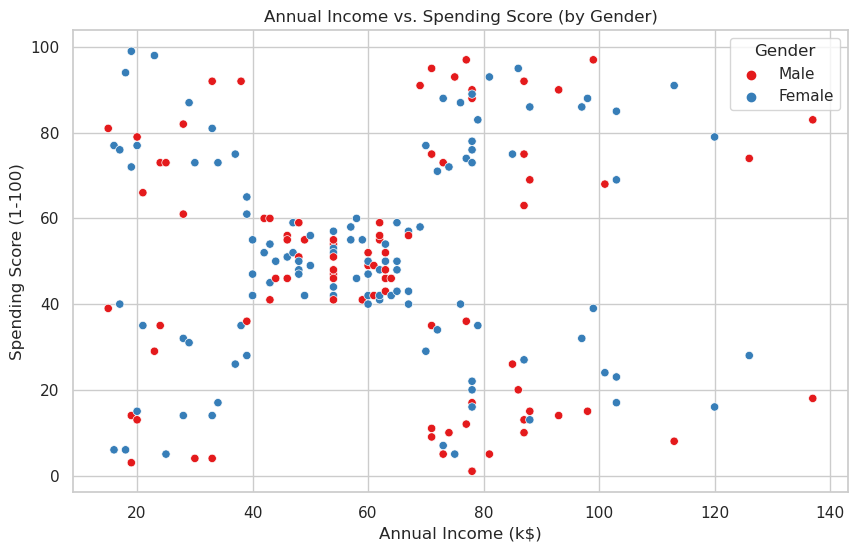

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    hue="Genre",
    palette="Set1"
)
plt.title("Annual Income vs. Spending Score (by Gender)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(title="Gender")
plt.grid(True)
plt.show()

Looking at this visualization, we can see there are apparent and defined clusters between these two variables. There is a separation of groups which could possibly allow us to identify segments based on income and spending behavior by customers.

## Age vs. Spending Score

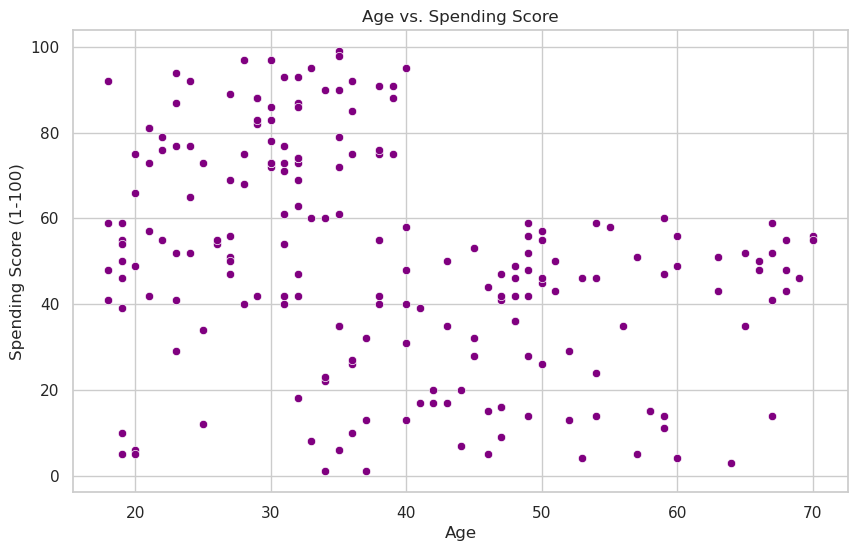

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x="Age",
    y="Spending Score (1-100)",
    color="purple"
)
plt.title("Age vs. Spending Score")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.grid(True)
plt.show()


This plot shows that age could maybe be useful in clustering, specifically figuring ou how high-spending customers are different from low-spending customers based on age. 

## Pre-Processing

## Checking for Null Values

In [24]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Checking for Duplicates in the data set

In [25]:
df.duplicated().sum()

0

## Building a boxplot to check if there are any outliers in the data set. This helps us get a better understanding of our data.

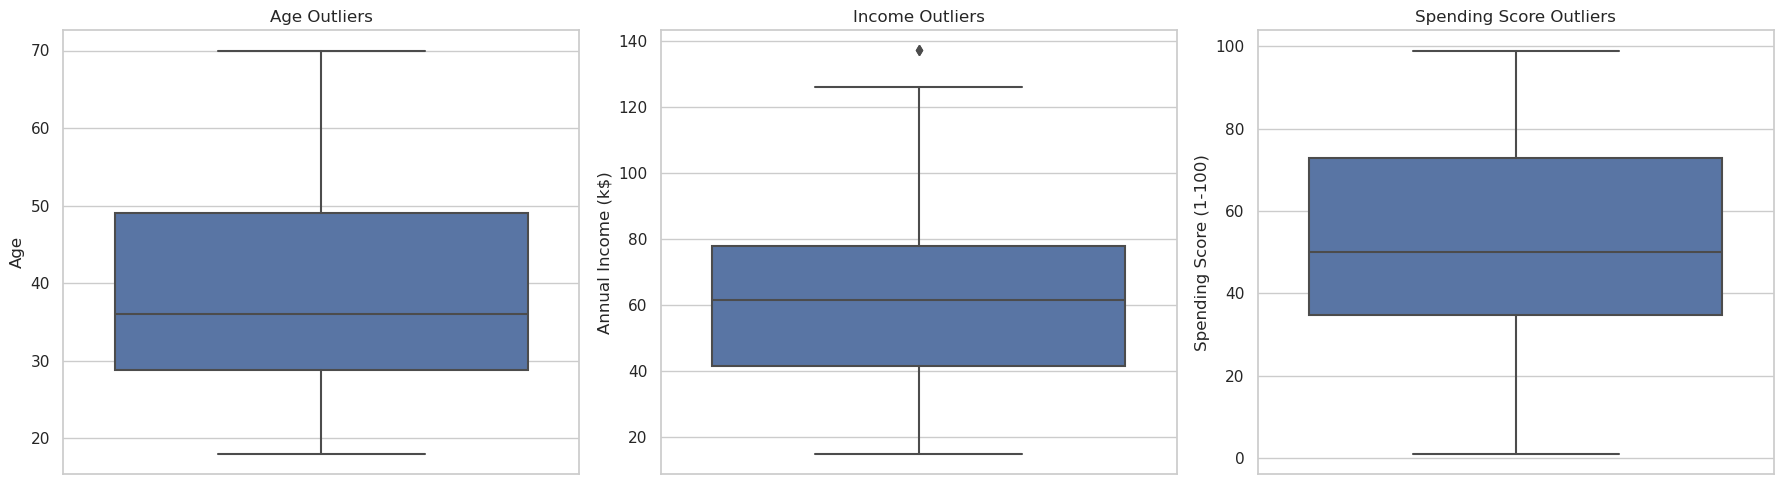

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.boxplot(y=df["Age"], ax=axes[0])
axes[0].set_title("Age Outliers")

sns.boxplot(y=df["Annual Income (k$)"], ax=axes[1])
axes[1].set_title("Income Outliers")

sns.boxplot(y=df["Spending Score (1-100)"], ax=axes[2])
axes[2].set_title("Spending Score Outliers")

plt.tight_layout()
plt.show()

## I decided to drop the CustomerID variable during pre-processing because this is just a unique identifier and doesn't really play into the a customers behavior when shopping at the mall.

In [27]:
df = df.drop("CustomerID", axis=1)
print(df.head())

    Genre  Age  Annual Income (k$)  Spending Score (1-100)
0    Male   19                  15                      39
1    Male   21                  15                      81
2  Female   20                  16                       6
3  Female   23                  16                      77
4  Female   31                  17                      40


## Modeling (Clustering)

## Storytelling (Clustering Analysis)



## Impact

## References
